## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import csv
import os
import numpy as np

# Study data files
mouse_metadata_path = os.path.join("data","Mouse_metadata.csv")
study_results_path = os.path.join("data","Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
meta_value_counts = mouse_metadata['Mouse ID'].value_counts()
meta_value_counts

d474    1
j989    1
g497    1
b128    1
c758    1
       ..
a788    1
u149    1
l471    1
k510    1
b742    1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
study_counts = study_results['Mouse ID'].value_counts()
study_counts

g989    13
i557    10
x773    10
m269    10
r811    10
        ..
o848     1
d133     1
x336     1
x226     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# # Merge Metadata and Study dataframes using outer function on column 'Mouse ID'
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# merged_df_counts = merged_df['Mouse ID'].value_counts()
# merged_df_counts
merged_df.to_csv('merged_df.csv')

In [7]:
# Combine the data into a single dataset
merged_df.head(300)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0


In [8]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Try sort_values before drop_duplicates()
merged_df.sort_values("Mouse ID", inplace = True)
merged_df["Mouse ID"].count()


1893

In [9]:
merged_df = merged_df.drop_duplicates(subset="Mouse ID")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
468,a251,Infubinol,Female,21,25,20,54.462594,1
477,a262,Placebo,Female,17,29,15,53.827974,2
490,a275,Ceftamin,Female,20,28,30,54.444713,2
498,a366,Stelasyn,Female,16,29,20,57.285987,0
...,...,...,...,...,...,...,...,...
1860,z435,Propriva,Female,12,26,0,45.000000,0
75,z578,Ramicane,Male,11,16,0,45.000000,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1879,z795,Naftisol,Female,13,29,30,59.789636,2


In [10]:
# Checking the number of mice in the DataFrame.
mice_series = merged_df['Mouse ID']
print(mice_series)


460     a203
468     a251
477     a262
490     a275
498     a366
        ... 
1860    z435
75      z578
1872    z581
1879    z795
1891    z969
Name: Mouse ID, Length: 249, dtype: object


In [11]:
mouse = merged_df['Mouse ID'][0]
print(mouse)

k403


In [12]:
len(mice_series)

249

In [13]:
# How to get access to the index in the mice_series?

In [14]:
# mice_list = []
# for mouse in range(len(mice_series)):
#     #print(mouse)
#     mice_list.append(mice_series[mouse])
# print(mice_list)

In [15]:
# duplicate_mice_by_id = []
# for mouse in range(mouse_ID_len):
#     duplicate_mice_by_id.append([mouse])
# duplicate_mice_by_id

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [18]:
# Checking the number of mice in the clean DataFrame.
merged_df['Mouse ID'].count()

249

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [20]:
# regimen_df = merged_df.set_index("Drug Regimen")
# regimen_df

In [21]:
# #regimen_summary = pd.DataFrame({"Mean": [regimen_df.mean()]})
# regimen_df = merged_df.groupby(['Drug Regimen'])
# regimen_df.mean()

In [22]:
# tumor_df = regimen_df['Tumor Volume (mm3)']
# volume_average = regimen_df['Tumor Volume (mm3)'].mean()
# volume_average.head()

In [23]:
regimen_df = merged_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# average_volume = regimen_df["Tumor Volume (mm3)"].mean()
# median_volume = regimen_df["Tumor Volume (mm3)"].median()
# var_volume = regimen_df["Tumor Volume (mm3)"].var()
# std_volume = regimen_df["Tumor Volume (mm3)"].std()
# sem = regimen_df["Tumor Volume (mm3)"].sem()
# summary_df = pd.DataFrame({'Average Volume (mm3)': [average_volume],
#                            'Median Volume (mm3)': [median_volume],
#                            'Variance (mm3)': [var_volume],
#                            'Standard Deviation (mm3)': [std_volume],
#                            'Standard Error': [sem]})
# summary_df

In [24]:
regimen_df["Tumor Volume (mm3)"].describe()

count    249.000000
mean      49.901161
std        8.899077
min       29.128472
25%       45.000000
50%       46.493024
75%       54.555442
max       78.567014
Name: Tumor Volume (mm3), dtype: float64

In [25]:
#regimen_summary = pd.DataFrame({"Mean": [regimen_df.mean()]})
grouped_regimen_df = merged_df.groupby(['Drug Regimen'])
describe_df = grouped_regimen_df["Tumor Volume (mm3)"].describe()

In [26]:
describe_df['Median'] = regimen_df["Tumor Volume (mm3)"].median()
describe_df['Standard Error'] = regimen_df["Tumor Volume (mm3)"].sem()
describe_df['Variance'] = regimen_df["Tumor Volume (mm3)"].var()

describe_df

,count,mean,std,min,25%,50%,75%,max,Median,Standard Error,Variance
Drug Regimen,,,,,,,,,,,
Capomulin,25.0,41.341391,5.074322,30.485985,38.379726,44.708055,45.473753,46.539206,46.493024,0.563956,79.193573
Ceftamin,25.0,50.773651,6.566238,45.000000,45.000000,47.242929,55.025724,66.622836,46.493024,0.563956,79.193573
Infubinol,25.0,53.954813,9.264389,36.321346,45.000000,54.462594,62.117279,72.226731,46.493024,0.563956,79.193573
Ketapril,25.0,52.656434,8.956614,45.000000,45.000000,49.762415,57.935912,78.567014,46.493024,0.563956,79.193573
Naftisol,25.0,54.037593,10.036429,45.000000,45.000000,48.786560,63.105696,75.113288,46.493024,0.563956,79.193573
Placebo,25.0,51.798419,8.892546,45.000000,45.000000,47.459053,53.827974,73.212939,46.493024,0.563956,79.193573
Propriva,25.0,49.421540,4.893454,45.000000,45.000000,49.145709,51.490740,62.330420,46.493024,0.563956,79.193573
Ramicane,25.0,41.045463,5.634409,29.128472,36.374510,44.512560,45.000000,46.378092,46.493024,0.563956,79.193573
Stelasyn,24.0,52.371257,8.756252,45.000000,45.000000,48.459299,57.367089,72.555239,46.493024,0.563956,79.193573


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

In [28]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [29]:
bar_df = merged_df[["Mouse ID", "Timepoint"]]
bar_df

,Mouse ID,Timepoint
460,a203,30
468,a251,20
477,a262,15
490,a275,30
498,a366,20
...,...,...
1860,z435,0
75,z578,0
1872,z581,45
1879,z795,30


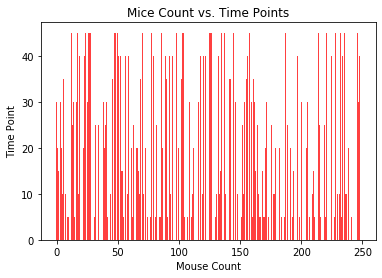

In [30]:
x_axis = np.arange(len(bar_df))
plt.bar(x_axis, bar_df["Timepoint"], color='r', alpha=0.75, align='center')
plt.title("Mice Count vs. Time Points")
plt.xlabel("Mouse Count")
plt.ylabel("Time Point")
plt.show()

In [31]:
bar_df2 = merged_df.groupby[["Mouse ID", "Timepoint"]]


TypeError: 'method' object is not subscriptable

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
